In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import os
import matplotlib.pyplot as plt

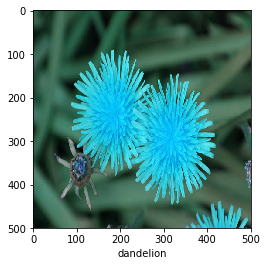

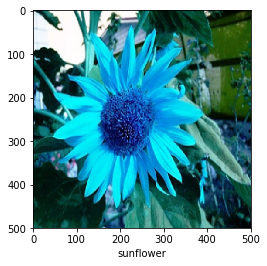

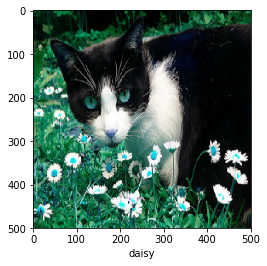

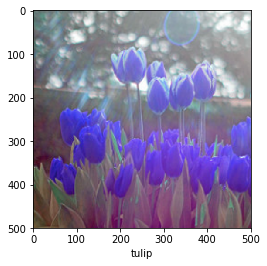

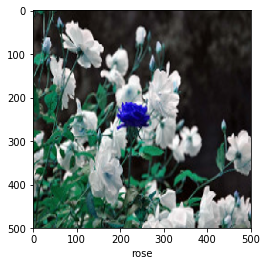

In [48]:

PATH = '/home/therochvoices/Desktop/flowers/training/'
for name in os.listdir(PATH):
    folder = PATH + name + '/'
    for file, i in zip(os.listdir(folder), range(0,1)):
        img = cv.imread(folder+file, cv.IMREAD_UNCHANGED)
        img = cv.resize(img, (500,500))
        plt.imshow(img)
        plt.xlabel(name)
        plt.show()
        

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/home/therochvoices/Desktop/flowers/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/home/therochvoices/Desktop/flowers/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 4210 images belonging to 5 classes.
Found 123 images belonging to 5 classes.


In [51]:
type(test_set)

keras.preprocessing.image.DirectoryIterator

In [45]:
cnn = Sequential()

In [52]:
cnn.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation = 'relu'))


32 = no. of filters
3, 3 = size of the feature map
64, 64, 3 = rows, cols, channels

In [53]:
cnn.add((MaxPooling2D((2, 2))))

In [54]:
cnn.add(Convolution2D(32, 3, 3, activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [55]:
cnn.add(Flatten())

In [57]:
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 5, activation = 'sigmoid'))

In [59]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [60]:
cnn.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 2000)

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=250, epochs=25, validation_steps=2000)`
  """


Epoch 1/25
250/250 [==============================] - 290s 1s/step - loss: 1.4563 - acc: 0.3597 - val_loss: 1.1645 - val_acc: 0.4472
Epoch 2/25
250/250 [==============================] - 291s 1s/step - loss: 1.1526 - acc: 0.4979 - val_loss: 1.0491 - val_acc: 0.4634
Epoch 3/25
250/250 [==============================] - 290s 1s/step - loss: 1.0233 - acc: 0.5727 - val_loss: 1.0790 - val_acc: 0.4797
Epoch 4/25
250/250 [==============================] - 285s 1s/step - loss: 0.9217 - acc: 0.6251 - val_loss: 0.9669 - val_acc: 0.5854
Epoch 5/25
250/250 [==============================] - 286s 1s/step - loss: 0.8274 - acc: 0.6726 - val_loss: 0.9459 - val_acc: 0.6504
Epoch 6/25
250/250 [==============================] - 287s 1s/step - loss: 0.7605 - acc: 0.7042 - val_loss: 0.9625 - val_acc: 0.6098
Epoch 7/25
250/250 [==============================] - 323s 1s/step - loss: 0.6784 - acc: 0.7459 - val_loss: 0.9360 - val_acc: 0.6179
Epoch 8/25
250/250 [==============================] - 321s 1s/step - 

In [62]:
# serialize model to YAML
model_yaml = cnn.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [3]:
from keras.models import model_from_yaml

In [7]:
# load json and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Loaded model from disk


In [8]:
from keras.preprocessing import image

In [15]:
img = image.load_img('test1.jpg', target_size=(64,64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
out = loaded_model.predict_classes(img_array)
print(out)

[2]


In [14]:
img = image.load_img('test2.jpg', target_size=(64,64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
out = loaded_model.predict_classes(img_array)
print(out)

[4]


In [13]:
img = image.load_img('test3.jpg', target_size=(64,64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
out = loaded_model.predict_classes(img_array)
print(out)

[2]


*****************
Rose
tulip13.jpg


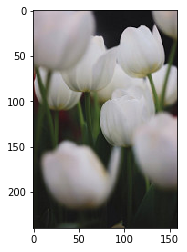

*****************
Daisy
daisy11.jpg


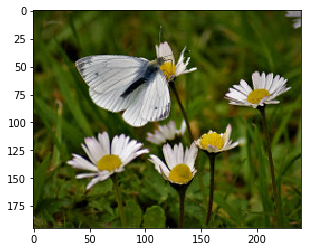

*****************
Rose
dandelion12.jpg


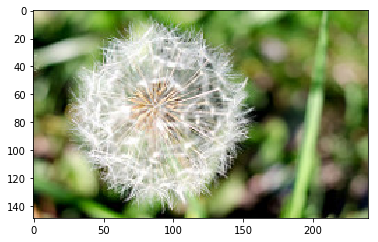

*****************
Daisy
tulip11.jpg


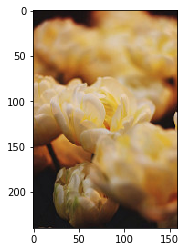

*****************
Sunflower
sunflower12.jpg


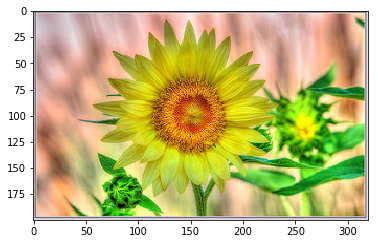

*****************
Sunflower
dandelion11.jpg


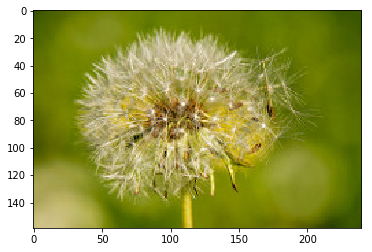

*****************
Tulip
tulip12.jpg


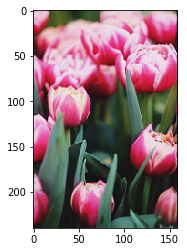

*****************
Sunflower
sunflower11.jpg


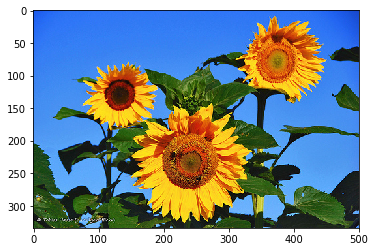

*****************
Rose
rose12.jpg


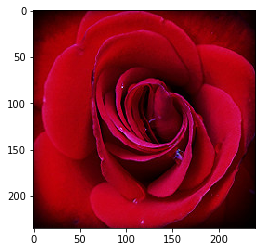

*****************
Sunflower
sunflower13.jpg


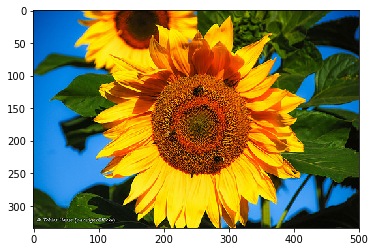

*****************
Rose
dandelion13.jpg


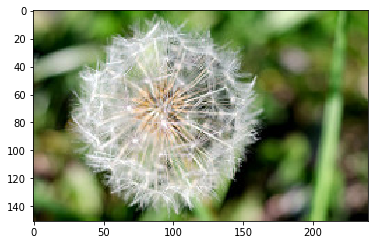

*****************
Daisy
daisy13.jpg


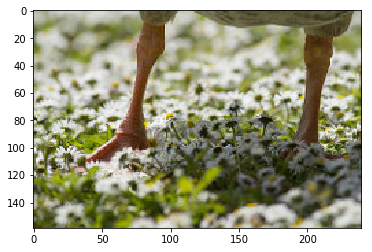

*****************
Rose
rose11.jpg


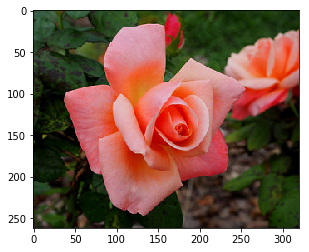

*****************
Rose
rose13.jpg


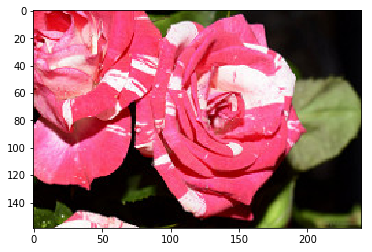

*****************
Daisy
daisy12.jpg


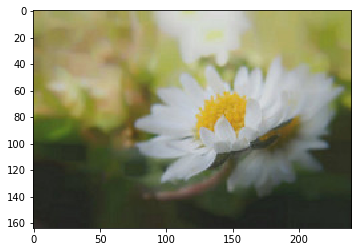

In [31]:
TEST_PATH = '/home/therochvoices/Desktop/attempts-with-data/FlowerIdentifier/sample/'
for file in os.listdir(TEST_PATH):
    print('*****************')
    img = image.load_img(TEST_PATH + file, target_size=(64,64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    out = loaded_model.predict_classes(img_array)
    print(labels[out[0]])
    print(file)
    img = image.load_img(TEST_PATH + file)
    plt.imshow(img)
    plt.show()

In [25]:
labels

['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']